In [4]:
# Regular EDA and plotting libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

In [5]:
# Read data
df = pd.read_csv('data/games_formatted.csv')
# Remove ID of Game
df = df.drop('GAME_ID',axis=1)
df.head()
print(len(df.index))

21930


In [6]:
# Remove row that have missing values due to infamillarity with original dataset
print('Before drop',len(df.index),'rows')
games = df.dropna()
print('After drop',len(df.index),'rows')

Before drop 21930 rows
After drop 21930 rows


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21930 entries, 0 to 21929
Data columns (total 45 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   G_home                 21922 non-null  float64
 1   W_PCT_home             21922 non-null  float64
 2   HOME_RECORD_home       21922 non-null  float64
 3   ROAD_RECORD_home       21922 non-null  float64
 4   W_PCT_prev_home        21922 non-null  float64
 5   HOME_RECORD_prev_home  21922 non-null  float64
 6   ROAD_RECORD_prev_home  21922 non-null  float64
 7   G_away                 21920 non-null  float64
 8   W_PCT_away             21920 non-null  float64
 9   HOME_RECORD_away       21920 non-null  float64
 10  ROAD_RECORD_away       21920 non-null  float64
 11  W_PCT_prev_away        21920 non-null  float64
 12  HOME_RECORD_prev_away  21920 non-null  float64
 13  ROAD_RECORD_prev_away  21920 non-null  float64
 14  WIN_PRCT_home_3g       21930 non-null  float64
 15  PT

In [8]:
df.head()

,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,HOME_RECORD_away,...,WIN_PRCT_away_10g,PTS_away_10g,FG_PCT_away_10g,FT_PCT_away_10g,FG3_PCT_away_10g,AST_away_10g,REB_away_10g,GAME_DATE_EST,SEASON,HOME_TEAM_WINS
0,82.0,0.549,0.707317,0.390244,0.305,0.414634,0.195122,82.0,0.512,0.707317,...,0.4,95.8,0.4351,0.6791,0.3258,22.8,42.7,2005-10-10,2005,0
1,82.0,0.524,0.609756,0.439024,0.402,0.512195,0.292683,82.0,0.622,0.634146,...,0.6,101.9,0.4859,0.7998,0.4583,20.5,38.4,2005-10-11,2005,0
2,82.0,0.159,0.219512,0.097561,0.341,0.439024,0.243902,82.0,0.439,0.585366,...,0.2,97.6,0.4624,0.6709,0.3665,20.6,41.8,2005-10-11,2005,0
3,82.0,0.659,0.780488,0.536585,0.659,0.756098,0.560976,82.0,0.573,0.658537,...,0.5,102.1,0.4388,0.7533,0.4495,23.2,43.7,2005-10-11,2005,1
4,82.0,0.610,0.731707,0.487805,0.671,0.829268,0.512195,82.0,0.707,0.707317,...,0.5,106.4,0.4555,0.7801,0.3558,17.6,44.5,2005-10-11,2005,0


## Data Exploration (EDA)

In [9]:
# Let's see how many positive (1) and negative (0) samples we have in our dataframe
df['HOME_TEAM_WINS'].value_counts()

1    12912
0     9018
Name: HOME_TEAM_WINS, dtype: int64

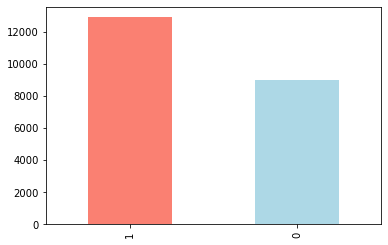

In [10]:
df['HOME_TEAM_WINS'].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [11]:
df.describe()

,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,HOME_RECORD_away,...,REB_home_10g,WIN_PRCT_away_10g,PTS_away_10g,FG_PCT_away_10g,FT_PCT_away_10g,FG3_PCT_away_10g,AST_away_10g,REB_away_10g,SEASON,HOME_TEAM_WINS
count,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21922.000000,21920.000000,21920.000000,21920.000000,...,21930.000000,21930.000000,21930.000000,21930.000000,21930.000000,21930.000000,21930.000000,21930.000000,21930.000000,21930.000000
mean,53.017882,0.508388,0.595489,0.422547,0.506033,0.597778,0.414347,52.941834,0.509037,0.594324,...,42.644565,0.502253,102.105942,0.456054,0.759008,0.353824,22.078299,42.730351,2012.370771,0.588782
std,23.515190,0.164096,0.187623,0.176870,0.153251,0.169860,0.155857,23.510511,0.163100,0.185846,...,2.982138,0.204379,7.555879,0.023103,0.042826,0.038095,2.745292,2.971854,4.582005,0.492066
min,10.000000,0.000000,0.000000,0.000000,0.106000,0.121212,0.073171,10.000000,0.000000,0.000000,...,32.400000,0.000000,79.900000,0.378700,0.544500,0.191800,13.800000,32.500000,2005.000000,0.000000
25%,32.000000,0.390000,0.463415,0.292683,0.402000,0.487805,0.292683,32.000000,0.391000,0.463415,...,40.600000,0.400000,96.600000,0.440400,0.731100,0.329200,20.200000,40.700000,2008.000000,0.000000
50%,55.000000,0.512000,0.609756,0.416667,0.512000,0.609756,0.414634,55.000000,0.512000,0.608696,...,42.600000,0.500000,101.400000,0.455500,0.761100,0.354300,21.900000,42.600000,2012.000000,1.000000
75%,77.000000,0.628000,0.731707,0.550000,0.621000,0.731707,0.536585,76.000000,0.627000,0.731707,...,44.600000,0.600000,107.100000,0.471600,0.789100,0.378800,23.800000,44.700000,2016.000000,1.000000
max,82.000000,1.000000,1.000000,1.000000,0.890000,0.975610,0.829268,82.000000,1.000000,1.000000,...,54.600000,1.000000,131.100000,0.546900,0.893000,0.507100,34.400000,54.700000,2020.000000,1.000000


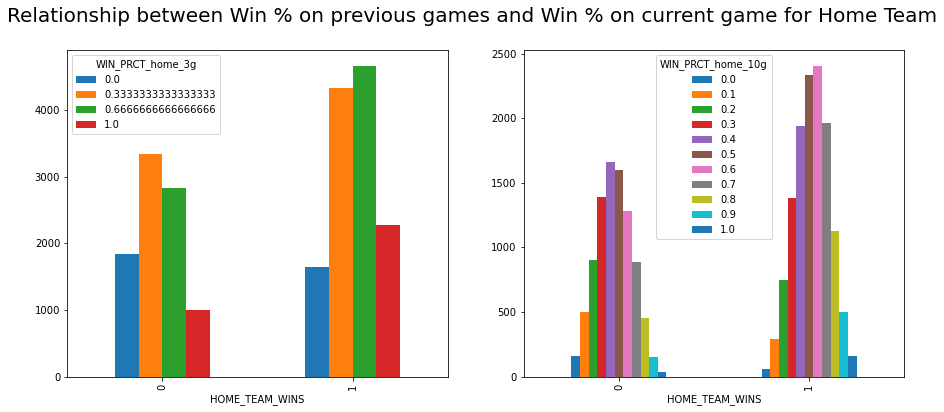

In [12]:
# Lets see how the winning percentage on previous games affect the winninig percentage of current game
fig, axes = plt.subplots(1,2, figsize=(25,5))
fig.suptitle("Relationship between Win % on previous games and Win % on current game for Home Team", fontsize=20)
pd.crosstab(df['HOME_TEAM_WINS'], df['WIN_PRCT_home_3g']).plot(kind="bar", 
                                    figsize=(10,6),ax=axes[0]);
pd.crosstab(df['HOME_TEAM_WINS'], df['WIN_PRCT_home_10g']).plot(kind="bar", 
                                    figsize=(15,6),ax=axes[1]);

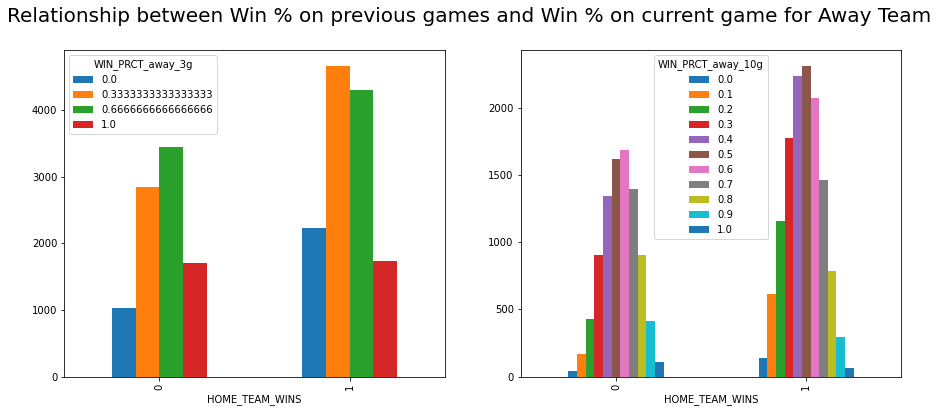

In [13]:
# Note: For Away Team, if HOME_TEAM_WINS == 0, Away Team win then vice versa 
fig, axes = plt.subplots(1,2, figsize=(25,5))
fig.suptitle("Relationship between Win % on previous games and Win % on current game for Away Team", fontsize=20)
pd.crosstab(df['HOME_TEAM_WINS'], df['WIN_PRCT_away_3g']).plot(kind="bar", 
                                    figsize=(10,6),ax=axes[0]);
pd.crosstab(df['HOME_TEAM_WINS'], df['WIN_PRCT_away_10g']).plot(kind="bar", 
                                    figsize=(15,6),ax=axes[1]);

In [14]:
# Conclusion: Looks like winning percentage for away team is not going to favor for the side of away team 
# for current game

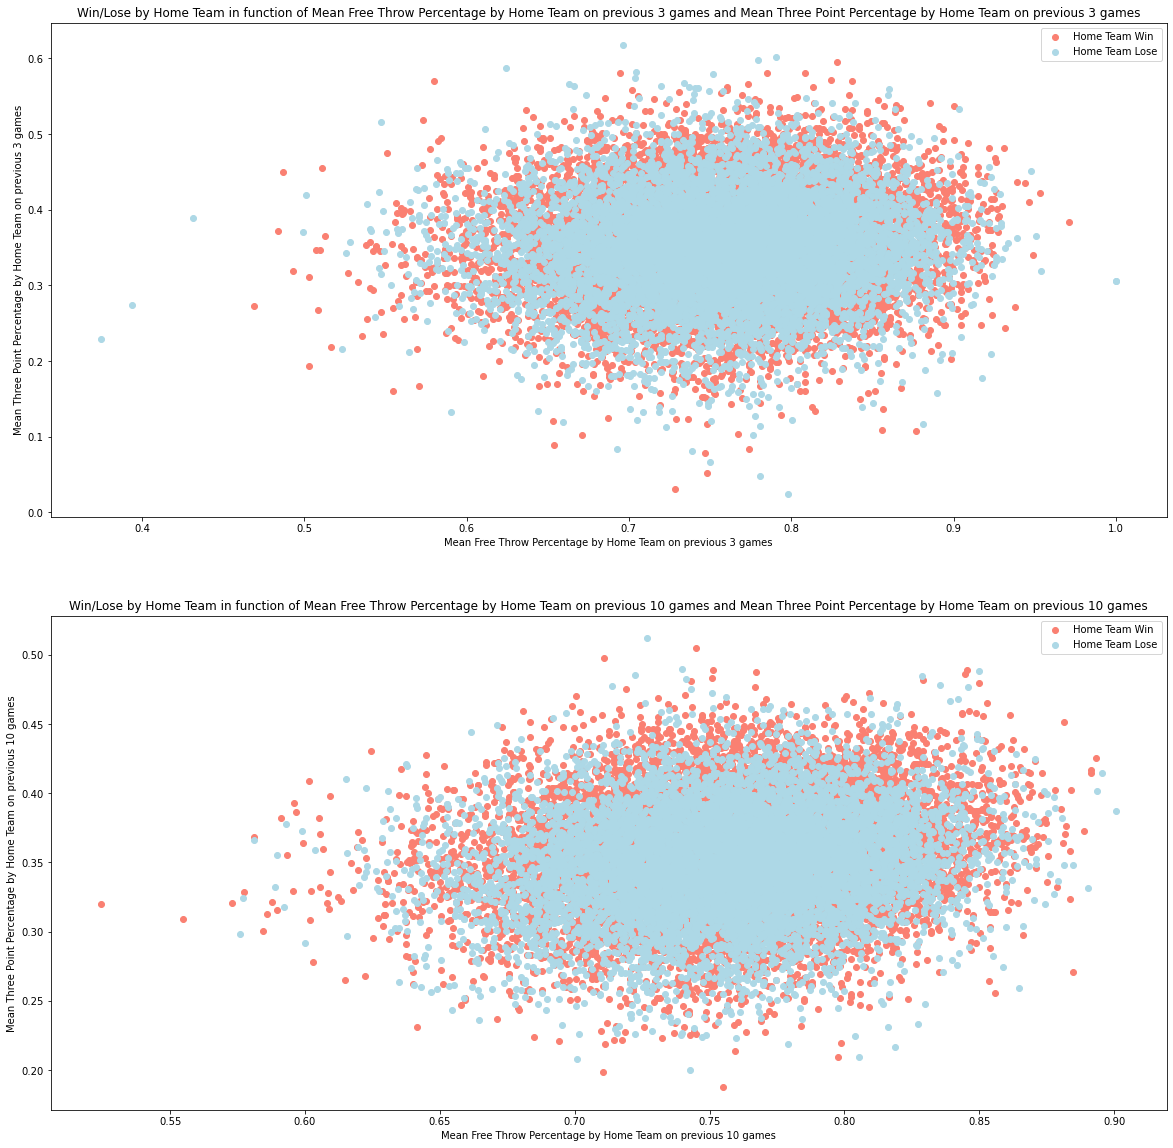

In [15]:
# Investigate that is the number of previous games for game stats will affect the target variable?
fig, axes = plt.subplots(2,1, figsize=(20,20))


# Start with positve examples
axes[0].scatter(df['FT_PCT_home_3g'][df['HOME_TEAM_WINS']==1], 
            df['FG3_PCT_home_3g'][df['HOME_TEAM_WINS']==1], 
            c="salmon",) 

# Now for negative examples,
axes[0].scatter(df['FT_PCT_home_3g'][df['HOME_TEAM_WINS']==0], 
            df['FG3_PCT_home_3g'][df['HOME_TEAM_WINS']==0], 
            c="lightblue") 


axes[0].set_title("Win/Lose by Home Team in function of Mean Free Throw Percentage by Home Team on previous 3 games and Mean Three Point Percentage by Home Team on previous 3 games")
axes[0].set_xlabel("Mean Free Throw Percentage by Home Team on previous 3 games")
axes[0].legend(["Home Team Win", "Home Team Lose"])
axes[0].set_ylabel("Mean Three Point Percentage by Home Team on previous 3 games");


# Start with positve examples
axes[1].scatter(df['FT_PCT_home_10g'][df['HOME_TEAM_WINS']==1], 
            df['FG3_PCT_home_10g'][df['HOME_TEAM_WINS']==1], 
            c="salmon") 

# Now for negative examples,
axes[1].scatter(df['FT_PCT_home_10g'][df['HOME_TEAM_WINS']==0], 
            df['FG3_PCT_home_10g'][df['HOME_TEAM_WINS']==0], 
            c="lightblue") 


axes[1].set_title("Win/Lose by Home Team in function of Mean Free Throw Percentage by Home Team on previous 10 games and Mean Three Point Percentage by Home Team on previous 10 games")
axes[1].set_xlabel("Mean Free Throw Percentage by Home Team on previous 10 games")
axes[1].legend(["Home Team Win", "Home Team Lose"])
axes[1].set_ylabel("Mean Three Point Percentage by Home Team on previous 10 games");

In [16]:
# Conclusion: Look like the number of previous game for game stats does not matter
# but we also can see that the relationship between free throw percentange & three points percentage
# doesn't affect the target variable very significantly too since the points for win case and lose case
# overlap a lot.

### Correlation Matrix

In [19]:
# Find the correlation between our independent variables
corr_matrix = df.corr()
corr_matrix 

,G_home,W_PCT_home,HOME_RECORD_home,ROAD_RECORD_home,W_PCT_prev_home,HOME_RECORD_prev_home,ROAD_RECORD_prev_home,G_away,W_PCT_away,HOME_RECORD_away,...,REB_home_10g,WIN_PRCT_away_10g,PTS_away_10g,FG_PCT_away_10g,FT_PCT_away_10g,FG3_PCT_away_10g,AST_away_10g,REB_away_10g,SEASON,HOME_TEAM_WINS
G_home,1.000000,0.066523,0.076809,0.041533,0.047540,0.048936,0.039931,0.953875,0.057225,0.074974,...,-0.025817,0.002171,-0.011117,-0.014459,-0.051263,-0.027482,-0.020848,-0.015033,-0.042066,0.005769
W_PCT_home,0.066523,1.000000,0.900035,0.892503,0.612903,0.568903,0.585232,0.073556,0.028726,0.020036,...,0.157920,0.022867,0.013072,0.013834,0.010240,-0.001101,-0.008980,0.006576,-0.004524,0.246197
HOME_RECORD_home,0.076809,0.900035,1.000000,0.617204,0.543775,0.512036,0.511275,0.079138,0.036764,0.036367,...,0.123315,0.031021,-0.019327,0.016475,-0.004409,-0.003332,-0.028522,-0.016035,-0.063577,0.226848
ROAD_RECORD_home,0.041533,0.892503,0.617204,1.000000,0.556188,0.508213,0.539836,0.050367,0.012738,-0.002277,...,0.158051,0.008777,0.043568,0.009889,0.024741,0.003162,0.014018,0.025994,0.057257,0.215029
W_PCT_prev_home,0.047540,0.612903,0.543775,0.556188,1.000000,0.945812,0.935597,0.055032,0.019945,0.016509,...,0.038710,0.020268,0.013470,0.018010,0.005972,-0.003216,-0.011343,0.002824,-0.005695,0.178680
HOME_RECORD_prev_home,0.048936,0.568903,0.512036,0.508213,0.945812,1.000000,0.770283,0.055633,0.018113,0.020258,...,0.014634,0.018092,-0.020685,0.010990,-0.005258,-0.009425,-0.036609,-0.017317,-0.059460,0.167023
ROAD_RECORD_prev_home,0.039931,0.585232,0.511275,0.539836,0.935597,0.770283,1.000000,0.047389,0.019480,0.010268,...,0.060524,0.020162,0.049737,0.023653,0.017728,0.004065,0.018112,0.024777,0.054535,0.169314
G_away,0.953875,0.073556,0.079138,0.050367,0.055032,0.055633,0.047389,1.000000,0.058630,0.078166,...,-0.021113,0.001185,-0.007196,-0.013539,-0.054214,-0.027635,-0.018833,-0.015085,-0.038070,0.007242
W_PCT_away,0.057225,0.028726,0.036764,0.012738,0.019945,0.018113,0.019480,0.058630,1.000000,0.903265,...,0.000538,0.721407,0.259693,0.383563,0.118298,0.249819,0.213211,0.156027,-0.001347,-0.210977
HOME_RECORD_away,0.074974,0.020036,0.036367,-0.002277,0.016509,0.020258,0.010268,0.078166,0.903265,1.000000,...,-0.024932,0.649090,0.208620,0.346640,0.101581,0.223197,0.161221,0.122842,-0.063311,-0.187169


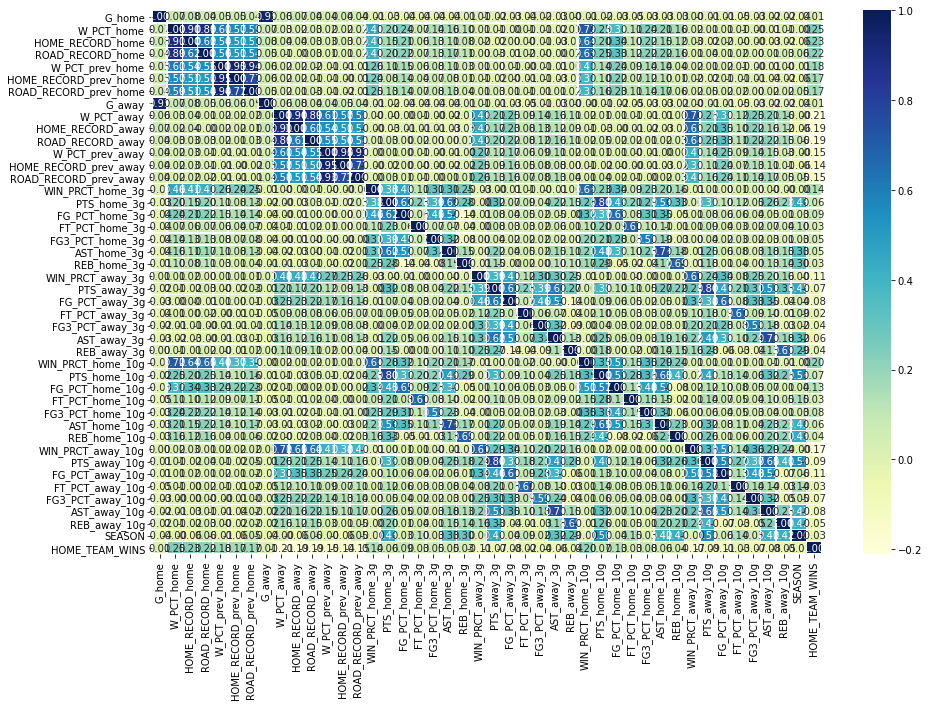

In [20]:
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, 
            annot=True, 
            linewidths=0.5, 
            fmt= ".2f", 
            cmap="YlGnBu");